In [1]:
from helpers import *

# Récupère le modèle entrainé
with open("models/kmeans_pca_model_5_elkan.pkl", 'rb') as f:  
    kmeans = pickle.load(f)

Les données vont du 04/09/2016 au 17/10/2018 (2 ans, 1 mois et 13 jours).

Je vais tester la différence de clusters entre plusieurs plages de dates.
Je comparerai la différence de cluster pour chaque test en utilisant l'ARI (Adjusted Rank Score).

Je vais donc commencer à utiliser toutes les données pour analyser tout les clients et je réduirai les données d'une semaine par une semaine jusqu'à ce que je sois en dessous du seuil de 0,8.

En dessous, je considérerai que les clusters change trop et donc mettre à jour la simulation.

In [5]:
end_date = datetime.strptime("2018-10-17 00:00:00", "%Y-%m-%d %H:%M:%S")  
start_date = datetime.strptime("2016-09-04 00:00:00", "%Y-%m-%d %H:%M:%S")  
stop_time_date = datetime.strptime("2018-03-04 00:00:00", '%Y-%m-%d %H:%M:%S')

(final_df, undersample_df, df_half) = get_segmented_data(end_date)

In [6]:
# Je récupère mes données de cluster pour T0
df = final_df.drop(columns=["customer_unique_id", "last_order_date"], axis=1)
df_data = pd.DataFrame(final_df[["customer_unique_id"]])

(pca, kmeans, labels) = get_original_label_of_dataframe(df, kmeans)
df_data['T0'] = labels


In [7]:
# Je prépare à créer mes T1, T2, Tn
i = 1

while True:  
    t_date = end_date - timedelta(weeks=i)
    t_label = f"T{i}"
    
    df_data = get_dataframe_with_label_from_date(df_data, pca, kmeans, t_date, t_label) 
    
    i += 1
    print(t_date)
    if t_date < stop_time_date:  
        break

2018-10-10 00:00:00
2018-10-03 00:00:00
2018-09-26 00:00:00
2018-09-19 00:00:00
2018-09-12 00:00:00
2018-09-05 00:00:00
2018-08-29 00:00:00
2018-08-22 00:00:00
2018-08-15 00:00:00
2018-08-08 00:00:00
2018-08-01 00:00:00
2018-07-25 00:00:00
2018-07-18 00:00:00
2018-07-11 00:00:00
2018-07-04 00:00:00
2018-06-27 00:00:00
2018-06-20 00:00:00
2018-06-13 00:00:00
2018-06-06 00:00:00
2018-05-30 00:00:00
2018-05-23 00:00:00
2018-05-16 00:00:00
2018-05-09 00:00:00
2018-05-02 00:00:00
2018-04-25 00:00:00
2018-04-18 00:00:00
2018-04-11 00:00:00
2018-04-04 00:00:00
2018-03-28 00:00:00
2018-03-21 00:00:00
2018-03-14 00:00:00
2018-03-07 00:00:00
2018-02-28 00:00:00


In [9]:
df_data.head(20)

,customer_unique_id,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33
0,0000366f3b9a7992bf8c76cfdf3221e2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,0000f46a3911fa3c0805444483337064,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,0004bd2a26a76fe21f786e4fbd80607f,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0
6,00050ab1314c0e55a6ca13cf7181fecf,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,00053a61a98854899e70ed204dd4bafe,4,4,4,4.0,4.0,4.0,4.0,4.0,4.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8,0005e1862207bf6ccc02e4228effd9a0,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [10]:
# Je calcul l'ARI score et stock ça dans un objet
reference_column = 'T0'
ari_scores = {}  

# Loop through all columns except the reference column  
for column in df_data.drop(columns=["customer_unique_id"], axis=1).columns:  
    if column != reference_column:
        # Calculate ARI between reference column and current column  
        ari = adjusted_rand_score(df_data[reference_column], df_data[column])  

        # Store the ARI score in the dictionary  
        ari_scores[column] = ari  

# Print the dictionary of ARI scores  
print(ari_scores)

{'T1': 0.9995319868915813, 'T2': 0.9991424880519502, 'T3': 0.9985450443720114, 'T4': 0.9993760758280332, 'T5': 0.9993241966205575, 'T6': 0.9995319868915813, 'T7': 0.9968835351992378, 'T8': 0.9628695773677012, 'T9': 0.884488460268541, 'T10': 0.8011072127796104, 'T11': 0.7235698788309145, 'T12': 0.675203548952581, 'T13': 0.6230372981400577, 'T14': 0.5964296432516112, 'T15': 0.5753969074851056, 'T16': 0.5555122224829071, 'T17': 0.5391900853091237, 'T18': 0.527556767730803, 'T19': 0.5221577444272233, 'T20': 0.5236903052542523, 'T21': 0.5188116281637073, 'T22': 0.519101421770421, 'T23': 0.5203584462292006, 'T24': 0.49943257146890097, 'T25': 0.4752970682411625, 'T26': 0.4645579297072675, 'T27': 0.46096308723492835, 'T28': 0.4684031737058775, 'T29': 0.46566420925961693, 'T30': 0.46428831107602164, 'T31': 0.4786113808343117, 'T32': 0.5083745035694684, 'T33': 0.49451774107037877}


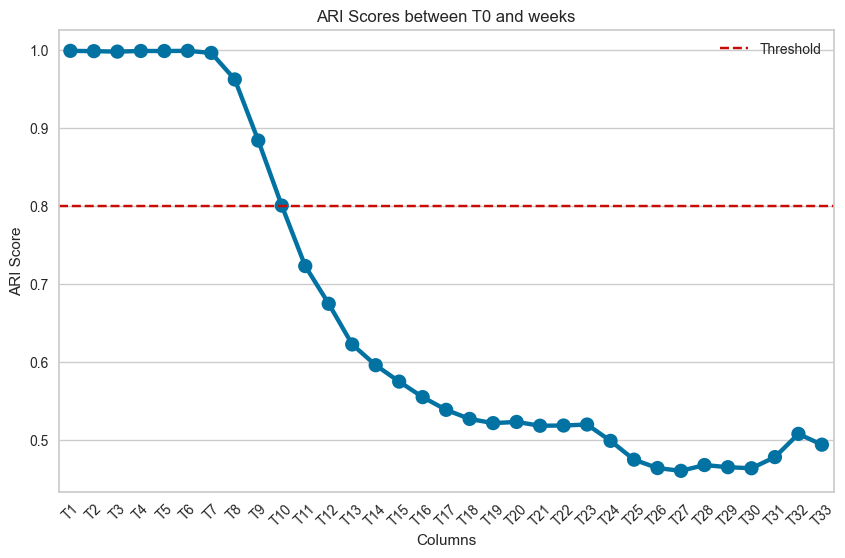

In [11]:
# J'affiche le graphique

# Créer une liste de colonnes et les scores ARI correspondants
columns = list(ari_scores.keys())  
ari_values = list(ari_scores.values())  
  
# Créer un tracé linéaire des scores ARI
plt.figure(figsize=(10,6))  
sns.pointplot(x=columns, y=ari_values)  
plt.xlabel('Columns')  
plt.ylabel('ARI Score')  
plt.title('ARI Scores between T0 and weeks')  
  
# Ajouter une ligne horizontale au seuil de 0,8
plt.axhline(y=0.8, color='r', linestyle='--', label='Threshold')  
  
plt.xticks(rotation=45)  
plt.legend()
plt.show()

In [12]:
# Test pour debug 
# simulation_delay_in_days = 0
# simulation_base_date = end_date - timedelta(days=simulation_delay_in_days)  

# (final_df, undersample_df, df_half) = get_segmented_data(simulation_base_date)
# df = final_df.drop(columns=["customer_unique_id", "last_order_date"], axis=1)
# df_data = pd.DataFrame(final_df[["customer_unique_id"]])

In [15]:
# Test pour debug 
# (pca, kmeans, labels) = get_original_label_of_dataframe(df, kmeans)
# df_data['T0'] = labels

# date_to_check = simulation_base_date - timedelta(days=30)  
# df_data = get_dataframe_with_label_from_date(df_data, pca, kmeans, date_to_check, "T1")

# date_to_check = simulation_base_date - timedelta(days=60)  
# df_data = get_dataframe_with_label_from_date(df_data, pca, kmeans, date_to_check, "T2")
 
# date_to_check = simulation_base_date - timedelta(days=70)  
# df_data = get_dataframe_with_label_from_date(df_data, pca, kmeans, date_to_check, "T3")
 
# print(adjusted_rand_score(df_data["T0"], df_data["T1"]))
# print(adjusted_rand_score(df_data["T0"], df_data["T2"]))
# print(adjusted_rand_score(df_data["T0"], df_data["T3"]))


0.9961579832934955
0.9208280853174476
0.8011072127796104


Je remarque que le seuil de 0.8 est atteint à T10, je peux donc proposer un contrat de maintenance les 10 semaines. 
Soit tous les 2 ou 3 mois suivant la préférence du client.